<a href="https://colab.research.google.com/github/dhruvjha206/Mech-Prop-using-ML/blob/main/Al6061_150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**For Aluminium 6061 Alloy at 150°C**

In [ ]:
# Importing Important Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas.testing as tm
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as slm

### Data Preparation

About the Data Set

The dataset is stress-strain ( Tensile and Microindentation ) of Aluminium 6061 Alloy under uniaxial and plain strain tension at 6 different temperatures.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading csv
path = "/content/drive/MyDrive/Al6061_150.csv"
df = pd.read_csv(path, encoding= 'unicode_escape')

Dataset

In [ ]:
df

,Alloy_Name,Temp (°C),Strain,Stress_MPa,Specimen_Type
0,Al6061,150,-0.000029,0.192261,Uniaxial tension
1,Al6061,150,-0.000049,0.175688,Uniaxial tension
2,Al6061,150,-0.000083,0.171677,Uniaxial tension
3,Al6061,150,-0.000112,0.319099,Uniaxial tension
4,Al6061,150,-0.000154,0.664752,Uniaxial tension
...,...,...,...,...,...
843,Al6061,150,0.162319,173.197507,Uniaxial tension
844,Al6061,150,0.162465,172.606949,Uniaxial tension
845,Al6061,150,0.162627,172.125882,Uniaxial tension
846,Al6061,150,0.162826,171.479881,Uniaxial tension


Finding Missing Values in the Data Set

In [ ]:
df.isnull().sum()

Alloy_Name       0
Temp (°C)        0
Strain           0
Stress_MPa       0
Specimen_Type    0
dtype: int64

In [ ]:
df = df.drop([df.index[847]])
df

,Alloy_Name,Temp (°C),Strain,Stress_MPa,Specimen_Type
0,Al6061,150,-0.000029,0.192261,Uniaxial tension
1,Al6061,150,-0.000049,0.175688,Uniaxial tension
2,Al6061,150,-0.000083,0.171677,Uniaxial tension
3,Al6061,150,-0.000112,0.319099,Uniaxial tension
4,Al6061,150,-0.000154,0.664752,Uniaxial tension
...,...,...,...,...,...
842,Al6061,150,0.161944,174.372188,Uniaxial tension
843,Al6061,150,0.162319,173.197507,Uniaxial tension
844,Al6061,150,0.162465,172.606949,Uniaxial tension
845,Al6061,150,0.162627,172.125882,Uniaxial tension


Let's Do Some Exploratory Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 0 to 846
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alloy_Name     847 non-null    object 
 1   Temp (°C)      847 non-null    int64  
 2   Strain         847 non-null    float64
 3   Stress_MPa     847 non-null    float64
 4   Specimen_Type  847 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 39.7+ KB


In [ ]:
df.describe()

,Temp (°C),Strain,Stress_MPa
count,847.0,847.000000,847.000000
mean,150.0,0.068288,213.599084
std,0.0,0.049594,47.150991
min,150.0,-0.000379,0.171677
25%,150.0,0.023116,220.100601
50%,150.0,0.064003,231.113011
75%,150.0,0.109856,235.657576
max,150.0,0.162826,237.543727


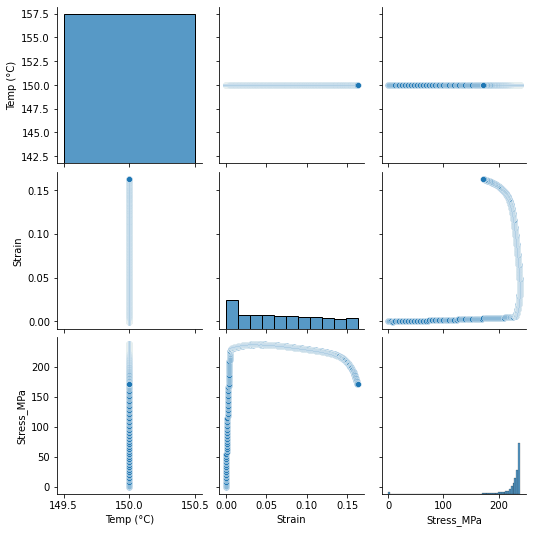

In [ ]:
sn.pairplot(data=df)

Data Plotting (Stress-strain curve)

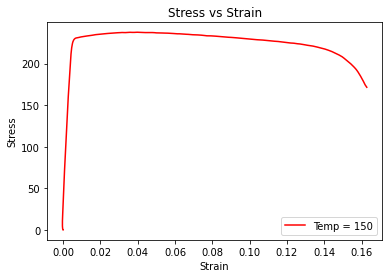

In [ ]:
plt.plot(df["Strain"], df["Stress_MPa"], color='r', label = 'Temp = 150')
plt.title("Stress vs Strain")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.legend()
plt.show()

In [ ]:
row = df.shape[0]
col = df.shape[1]

For finding **PROPORTIONAL LIMIT**, we need to find **Linear Regression line** with **minimum 95% accuracy**:

In [ ]:
# Plotting multiple Regression lines and finding their accuracy 
import random
prop_lim = random.randint(0,row)

for i in range(2, row):
  #Change to DataFrame 
  x = pd.DataFrame(df.loc[0:i , ['Strain']])
  y = pd.DataFrame(df.loc[0:i , ['Stress_MPa']])

  model = LinearRegression().fit(x, y)
  y_new = model.predict(x)

  acc = round(slm.r2_score(y, y_new), 2)
  if acc >= 0.95 :
    prop_lim = i
prop_lim    

121

In [ ]:
x1 = df.loc[[prop_lim]].Strain
y1 = df.iloc[[prop_lim]].Stress_MPa

### Building Regression model

In [ ]:
x = pd.DataFrame(df.loc[0:prop_lim , ['Strain']])
y = pd.DataFrame(df.loc[0:prop_lim , ['Stress_MPa']])

model = LinearRegression().fit(x, y)
y_new = model.predict(x)

Plotting Regression line and Proportional limit

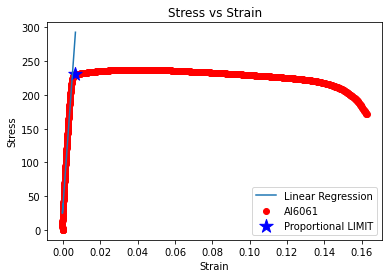

In [ ]:
plt.scatter(df["Strain"], df["Stress_MPa"], color='r', label = 'Al6061')
plt.plot(x, y_new, label='Linear Regression' )
plt.scatter(x1,y1,color='b',marker='*',s=200, label = 'Proportional LIMIT')
plt.title("Stress vs Strain")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.legend()
plt.show()

In [ ]:
# For Fracture Point
x4 = df.loc[[row-2]].Strain
y4 = df.loc[[row-2]].Stress_MPa

For the ultimate tensile strength:

In [ ]:
max_Stress = df.iloc[df['Stress_MPa'].idxmax()]
x3 = max_Stress['Strain']
y3 = max_Stress['Stress_MPa']

Finding Yield Point using offset method

In [ ]:
#Taking 0.2% as offset
df["Offset"] = df["Strain"] + 0.002
df

,Alloy_Name,Temp (°C),Strain,Stress_MPa,Specimen_Type,Offset
0,Al6061,150,-0.000029,0.192261,Uniaxial tension,0.001971
1,Al6061,150,-0.000049,0.175688,Uniaxial tension,0.001951
2,Al6061,150,-0.000083,0.171677,Uniaxial tension,0.001917
3,Al6061,150,-0.000112,0.319099,Uniaxial tension,0.001888
4,Al6061,150,-0.000154,0.664752,Uniaxial tension,0.001846
...,...,...,...,...,...,...
842,Al6061,150,0.161944,174.372188,Uniaxial tension,0.163944
843,Al6061,150,0.162319,173.197507,Uniaxial tension,0.164319
844,Al6061,150,0.162465,172.606949,Uniaxial tension,0.164465
845,Al6061,150,0.162627,172.125882,Uniaxial tension,0.164627


Building regression model for Yield Strength

In [ ]:
x = pd.DataFrame(df.loc[0:prop_lim , ['Strain']])
y = pd.DataFrame(df.loc[0:prop_lim , ['Stress_MPa']])

model = LinearRegression().fit(x, y)
y_new = model.predict(x)

xx = pd.DataFrame(df.loc[0:prop_lim, ['Offset']])
yy = pd.DataFrame(df.loc[0:prop_lim, ['Stress_MPa']])

model = LinearRegression().fit(xx, yy)
yy_new = model.predict(xx)

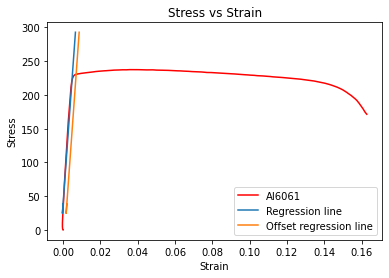

In [ ]:
plt.plot(df["Strain"], df["Stress_MPa"], color='r', label = 'Al6061')
plt.plot(x, y_new, label='Regression line' )
plt.plot(xx, yy_new, label='Offset regression line' )
plt.title("Stress vs Strain")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.legend()
plt.show()

Finding the yield point:

In [ ]:
for i in range (50, row):
  if(df.iloc[prop_lim]['Offset'] <= df.iloc[i]['Strain']) :
    x2 = df.loc[i].Strain
    y2 = df.loc[i].Stress_MPa
    break

### **Concluded PLOT**

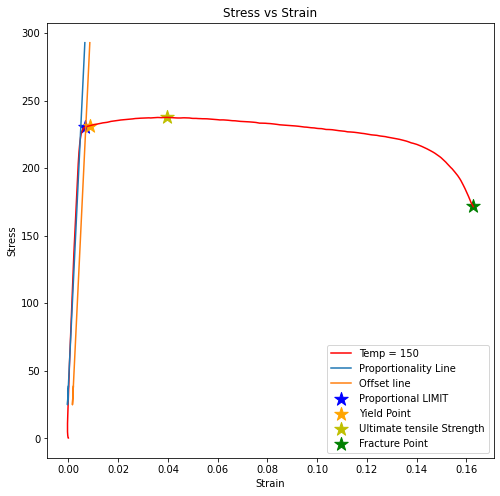

In [ ]:
plt.subplots(figsize=[8,8])
plt.plot(df["Strain"], df["Stress_MPa"], color='r', label = 'Temp = 150')
plt.scatter(x1,y1,color='b',marker='*',s=200, label = 'Proportional LIMIT')
plt.scatter(x2,y2,color='orange',marker='*',s=200, label = 'Yield Point')
plt.scatter(x3,y3,color='y',marker='*',s=200, label = 'Ultimate tensile Strength')
plt.scatter(x4,y4,color='g',marker='*',s=200, label = 'Fracture Point')
plt.plot(x, y_new, label='Proportionality Line')
plt.plot(xx, yy_new, label='Offset line' )
plt.title("Stress vs Strain")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.legend()
plt.show()

**Results for Al6061 at 150°C:**

In [ ]:
print('Proportional limit :' ,df.iloc[prop_lim]['Stress_MPa'] ,'MPa')
print('Yield Point :' ,df.iloc[i]['Stress_MPa'] ,'MPa')
print('Ultimate tensile strength :' , y3 ,'MPa')
print('Fracture point :' ,df.iloc[row-1]['Stress_MPa'] ,'MPa')

Proportional limit : 230.33451890000003 MPa
Yield Point : 231.43014700000003 MPa
Ultimate tensile strength : 237.5437267 MPa
Fracture point : 171.4798814 MPa


Model Accuracy:

In [ ]:
# Regression score function
print(slm.r2_score(y, y_new))

0.9454825074148511
